## Date: 17-10-2023

## Project Title: Credit Card Fraudlent Detection


## Team ID: 3890

## Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Set the jupyter notebook to show maximum number of columns 

In [3]:
pd.options.display.max_columns = None

### Loading the datasets

In [4]:
ccfd = pd.read_csv("C:\\Users\\Mohamed Safthar\\OneDrive\\Documents\\IBM\\creditcard.csv\\creditcard.csv")

### Displaying top 5 rows

In [5]:
ccfd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Displaying bottom 5 rows

In [6]:
ccfd.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Shows number of rows and columns

In [7]:
print("Number of rows in given dataset ",ccfd.shape[0])
print("Number of columns in the given dataset ",ccfd.shape[1])

Number of rows in given dataset  284807
Number of columns in the given dataset  31


### Getting basis information

In [8]:
ccfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking null values in the given data

In [9]:
ccfd.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Scaling the Amount features, removing the independent columns

In [10]:
#removing the column name Time, it is unnecessary to our training purposes
ccfd.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [11]:
#time features is unnecessary here
ccfd.drop('Time',axis = 1,inplace=True).head()

AttributeError: 'NoneType' object has no attribute 'head'

In [ ]:
ccfd.head()

### Scaling the Amount column data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
ss = StandardScaler()

In [14]:
ccfd['Amounts'] = ss.fit_transform(pd.DataFrame(ccfd['Amount']))

In [15]:
ccfd.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amounts
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [16]:
ccfd.shape

(284807, 31)

In [17]:
ccfd.drop('Amount',axis=1,inplace=True)

In [18]:
ccfd.shape

(284807, 30)

### Dropping the duplicate records

In [19]:
ccfd.duplicated().any()

True

In [20]:
ccfd.drop_duplicates(inplace=True)

In [21]:
ccfd.shape

(275663, 30)

In [22]:
284807 - 275663

9144

### Exploring Class columns 

In [23]:
ccfd['Class'].unique()

array([0, 1], dtype=int64)

In [24]:
ccfd['Class'].nunique()

2

In [25]:
ccfd['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

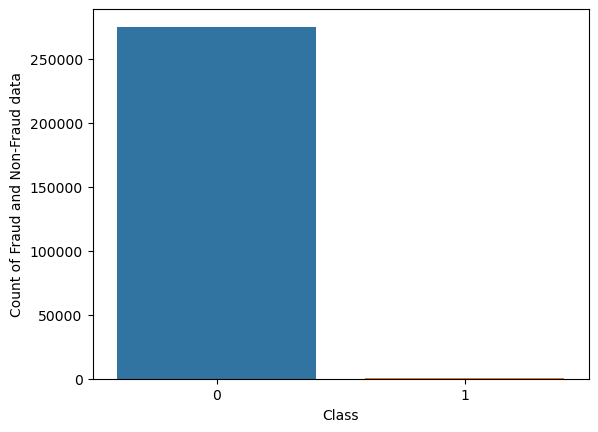

In [26]:
#visualizing the distribution of 0 and 1 using seaborn countplot
sns.countplot(ccfd,x = ccfd['Class'])
plt.xlabel('Class')
plt.ylabel('Count of Fraud and Non-Fraud data')
plt.show()

From the above information, We can say that our data is high imbalanced, so need to apply oversampling and undersampling technique to train our model

### Storing feature matrix in X and response (Target) in vector y

In [27]:
ccfd.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amounts
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [28]:
X = ccfd.drop('Class',axis = 1)

In [29]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amounts
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


In [30]:
y = ccfd.Class

In [31]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 275663, dtype: int64

### Splitting the dataset into the training set and test set

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [34]:
X_train.shape

(220530, 29)

### Training into the Model

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
LR = LogisticRegression()

In [37]:
LR.fit(X_train,y_train)

LogisticRegression()

### Evaluating the accuracy_score, precision_score 

In [38]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [39]:
y_pred = LR.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred)

0.9992200678359603

In [41]:
precision_score(y_test,y_pred)

0.8870967741935484

In [42]:
recall_score(y_test,y_pred)

0.6043956043956044

Here, precision_score is very low so we have to perform the oversampling and undersampling technique

### Handling Imbalanced dataset

In [43]:
#undersampling
#oversampling

### Undersampling

In [44]:
fraud = ccfd[ccfd['Class'] == 1]
normal = ccfd[ccfd['Class'] == 0]

In [45]:
fraud.shape

(473, 30)

In [46]:
normal.shape

(275190, 30)

In [47]:
#selecting the 473 necessary samples to balance the class feature
equal_sample = normal.sample(n=473)

In [48]:
equal_sample.shape

(473, 30)

In [49]:
new_ccfd = pd.concat([equal_sample,fraud],ignore_index = True)

In [50]:
new_ccfd['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [51]:
new_ccfd.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amounts
0,-0.948819,3.010633,-1.784999,4.909892,-0.124091,-0.260746,-0.486861,1.447982,-2.087255,0.858710,1.020976,-0.330577,-0.855726,-1.310023,-0.077559,1.195827,2.656902,1.486258,0.947496,0.157398,-0.299527,-0.971992,0.360957,-0.254898,-0.620193,0.043276,0.150002,-0.013614,0,-0.304813
1,-0.766755,0.117899,1.403212,-0.659576,0.555077,-0.125672,0.324570,0.172111,0.379706,-1.029134,-1.389223,-0.291042,-0.415584,-0.038227,0.445938,0.270086,-0.680673,0.202157,0.046567,0.103553,-0.092061,-0.472519,0.094432,0.410161,-0.187590,-0.617449,0.106772,0.157540,0,-0.138812
2,-0.547158,1.851470,-3.142172,-0.434762,1.905043,-0.955582,0.762074,0.533940,-1.190402,-1.819852,0.604838,0.709689,1.003627,-1.991228,-1.357889,0.979063,1.723925,1.401666,0.061678,-0.251356,0.167646,0.338157,-0.277606,-0.287396,-0.269441,0.529420,-0.267365,-0.025603,0,-0.350191
3,-0.948874,0.383492,1.494258,0.029963,1.873928,0.959658,0.496324,0.148733,1.132853,-0.819844,0.207657,-2.951987,0.252731,1.517977,-1.797593,0.063700,-0.117617,0.594034,-0.105364,-0.055958,-0.295104,-0.512876,-0.525134,-1.811972,0.799285,-0.369236,-0.164414,-0.194507,0,-0.327282
4,-2.992814,3.199763,-2.987774,-0.827036,-0.769432,-0.691311,-0.904229,2.222192,-0.030483,0.046033,0.209573,1.499305,0.595315,0.260048,-1.047489,1.096295,0.781249,0.425538,-0.040949,0.256460,-0.284733,-0.945528,0.341314,0.233771,0.017614,0.149587,0.251207,0.088521,0,-0.289300


<Axes: xlabel='Class', ylabel='count'>

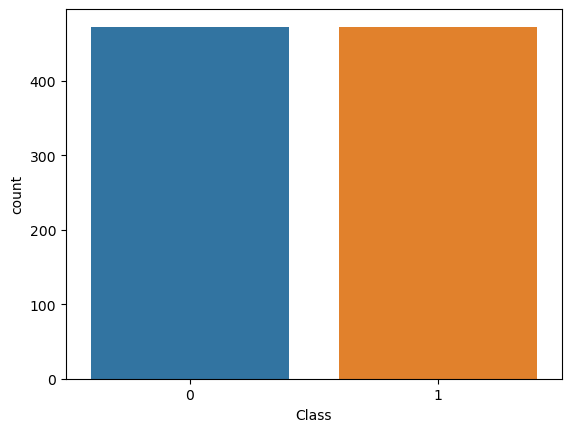

In [52]:
sns.countplot(x = new_ccfd['Class'],data=new_ccfd)

Now we equalized the Class feature

In [53]:
X = new_ccfd.drop('Class',axis = 1)

In [54]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amounts
0,-0.948819,3.010633,-1.784999,4.909892,-0.124091,-0.260746,-0.486861,1.447982,-2.087255,0.858710,1.020976,-0.330577,-0.855726,-1.310023,-0.077559,1.195827,2.656902,1.486258,0.947496,0.157398,-0.299527,-0.971992,0.360957,-0.254898,-0.620193,0.043276,0.150002,-0.013614,-0.304813
1,-0.766755,0.117899,1.403212,-0.659576,0.555077,-0.125672,0.324570,0.172111,0.379706,-1.029134,-1.389223,-0.291042,-0.415584,-0.038227,0.445938,0.270086,-0.680673,0.202157,0.046567,0.103553,-0.092061,-0.472519,0.094432,0.410161,-0.187590,-0.617449,0.106772,0.157540,-0.138812
2,-0.547158,1.851470,-3.142172,-0.434762,1.905043,-0.955582,0.762074,0.533940,-1.190402,-1.819852,0.604838,0.709689,1.003627,-1.991228,-1.357889,0.979063,1.723925,1.401666,0.061678,-0.251356,0.167646,0.338157,-0.277606,-0.287396,-0.269441,0.529420,-0.267365,-0.025603,-0.350191
3,-0.948874,0.383492,1.494258,0.029963,1.873928,0.959658,0.496324,0.148733,1.132853,-0.819844,0.207657,-2.951987,0.252731,1.517977,-1.797593,0.063700,-0.117617,0.594034,-0.105364,-0.055958,-0.295104,-0.512876,-0.525134,-1.811972,0.799285,-0.369236,-0.164414,-0.194507,-0.327282
4,-2.992814,3.199763,-2.987774,-0.827036,-0.769432,-0.691311,-0.904229,2.222192,-0.030483,0.046033,0.209573,1.499305,0.595315,0.260048,-1.047489,1.096295,0.781249,0.425538,-0.040949,0.256460,-0.284733,-0.945528,0.341314,0.233771,0.017614,0.149587,0.251207,0.088521,-0.289300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024
942,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191
943,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818
944,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302


In [55]:
y = new_ccfd.Class

In [56]:
y

0      0
1      0
2      0
3      0
4      0
      ..
941    1
942    1
943    1
944    1
945    1
Name: Class, Length: 946, dtype: int64

### Again Splitting the data for training and testing 

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [58]:
X_train.shape

(756, 29)

### Logistis Regression

In [59]:
LR.fit(X_train,y_train)

LogisticRegression()

In [60]:
y_pred1 = LR.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred1)

0.9526315789473684

In [62]:
precision_score(y_test,y_pred1)

1.0

In [63]:
f1_score(y_test,y_pred1)

0.9538461538461539

### Decision Tree Classification

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
DTC = DecisionTreeClassifier()

In [66]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
y_pred2 = DTC.predict(X_test)

### Evaluating the precision_score, accuracy_score, f1_score

In [68]:
accuracy_score(y_test,y_pred2)

0.8947368421052632

In [69]:
precision_score(y_test,y_pred2)

0.9270833333333334

In [70]:
f1_score(y_test,y_pred2)

0.898989898989899

### RandomForest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
RFC = RandomForestClassifier()

In [73]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [74]:
y_pred3 = RFC.predict(X_test)

### Evaluating the precision_Score, accuracy_score,f1_score

In [75]:
accuracy_score(y_test,y_pred3)

0.9421052631578948

In [76]:
precision_score(y_test,y_pred3)

1.0

In [77]:
f1_score(y_test,y_pred3)

0.9430051813471504

### LightBGM

In [78]:
pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/b3/f8/ee33e36194eb03a76eccf3adac3fba51f0e56fbd20609bb531659d48d3cb/lightgbm-4.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 1.3 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.3 MB 1.8 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.3 MB 2.5 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.3 MB 2.8 MB/s eta 0:00:01
   --------------------- ------------------ 0.7/1.3 MB 3.5 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/1.3 MB 3.6 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/1.3 MB 3.6 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/1.3 MB 3.6 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/1.3 MB 3.6 MB/s eta 0:00:01
   -------------------------- ----------

In [79]:
from lightgbm import LGBMClassifier

In [80]:
LGBM = LGBMClassifier()

In [81]:
LGBM.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 371, number of negative: 385
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7317
[LightGBM] [Info] Number of data points in the train set: 756, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490741 -> initscore=-0.037041
[LightGBM] [Info] Start training from score -0.037041
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier()

In [82]:
y_pred4 = LGBM.predict(X_test)

### Evaluating the precision_Score, accuracy_score,f1_score

In [83]:
accuracy_score(y_test,y_pred4)

0.9368421052631579

In [84]:
precision_score(y_test,y_pred4)

0.96875

In [85]:
f1_score(y_test,y_pred4)

0.9393939393939394

### Checking which model is performing better accuracy_score

In [86]:
stats = pd.DataFrame({'Model':['Logistic Regression','Decision Classifier','Random Forest','Light GBM'],
                    'Accuracy_score':[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4)]})

In [87]:
stats

,Model,Accuracy_score
0,Logistic Regression,0.952632
1,Decision Classifier,0.894737
2,Random Forest,0.942105
3,Light GBM,0.936842


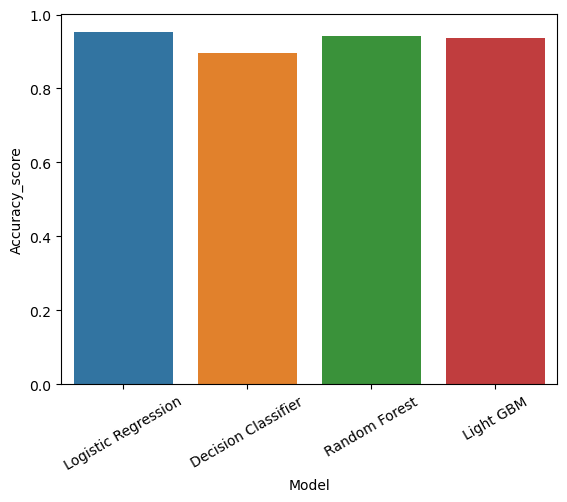

In [88]:

ax = sns.barplot(x = 'Model',y = 'Accuracy_score',data = stats)
plt.xticks(rotation=30)
plt.show()

As we are losting so much of feature information in undersampling, so move head to oversampling

### Oversampling

In [89]:
pip install imbalanced-learn==0.10.1

Note: you may need to restart the kernel to use updated packages.


In [90]:
pip install -U imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   ------ -------------------------------- 41.0/235.6 kB 487.6 kB/s eta 0:00:01
   ------------------ ------------------- 112.6/235.6 kB 930.9 kB/s eta 0:00:01
   ----------------------------- ---------- 174.1/235.6 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [91]:
from imblearn.over_sampling import SMOTE

In [92]:
x2 = ccfd.drop('Class',axis=1)

In [93]:
x2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amounts
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [94]:
y2 = ccfd.Class

In [95]:
y2

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 275663, dtype: int64

In [96]:
X_res,y_res = SMOTE().fit_resample(x2,y2)

In [97]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

### Again split the training and testing data

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.2,random_state=42)

### Train the Model

### Logistic Regression

In [99]:
#already imported
LR.fit(X_train,y_train)

LogisticRegression()

### Evaluating accuracy_score,precision_score,f1_score

In [100]:
accuracy_score(y_test,LR.predict(X_test))

0.944383880228206

In [101]:
precision_score(y_test,LR.predict(X_test))

0.9729107408912366

In [102]:
f1_score(y_test,LR.predict(X_test))

0.9426155749690676

### Decision Tree Classifier

In [103]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

### Evaluating accuracy_Score,precision_Score,f1_score

In [104]:
accuracy_score(y_test,DTC.predict(X_test))

0.9982466659398961

In [105]:
precision_score(y_test,DTC.predict(X_test))

0.9972781709308656

In [106]:
f1_score(y_test,DTC.predict(X_test))

0.998247255092496

### Random Forest Classifier

In [107]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

### Evaluating accuracy_Score,precision_Score,f1_score

In [108]:
accuracy_score(y_test,RFC.predict(X_test))

0.999918238308078

In [109]:
precision_score(y_test,RFC.predict(X_test))

0.9998363993310551

In [110]:
f1_score(y_test,RFC.predict(X_test))

0.9999181929736854

### LightGBM

In [111]:
LGBM.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 220187, number of negative: 220117
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 440304, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500079 -> initscore=0.000318
[LightGBM] [Info] Start training from score 0.000318


LGBMClassifier()

### Evaluating accuracy_Score,precision_Score,f1_score

In [112]:
accuracy_score(y_test,LGBM.predict(X_test))

0.9990642828591155

In [113]:
precision_score(y_test,LGBM.predict(X_test))

0.9983841098079088

In [114]:
f1_score(y_test,LGBM.predict(X_test))

0.9990643253604163

In [115]:
stats_oversampling = pd.DataFrame({'Model':['Logistic Regression','Decision Classifier','Random Forest','Light GBM'],
                    'Accuracy_score':[accuracy_score(y_test,LR.predict(X_test))*100,accuracy_score(y_test,DTC.predict(X_test))*100,accuracy_score(y_test,RFC.predict(X_test))*100,accuracy_score(y_test,LGBM.predict(X_test))*100]})

In [116]:
stats_oversampling

,Model,Accuracy_score
0,Logistic Regression,94.438388
1,Decision Classifier,99.824667
2,Random Forest,99.991824
3,Light GBM,99.906428


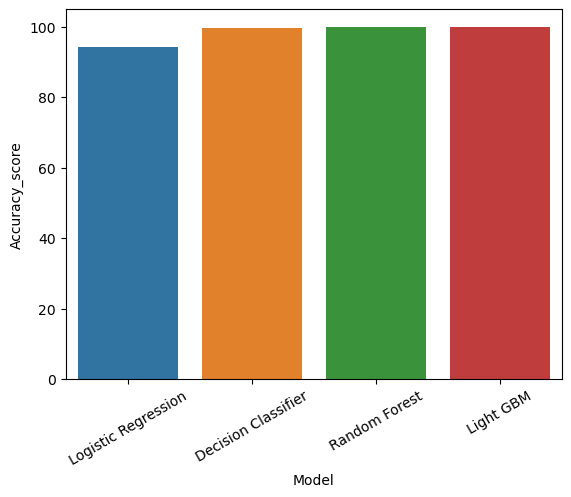

In [117]:
sns.barplot(x = 'Model',y = 'Accuracy_score',data = stats_oversampling)
plt.xticks(rotation=30)
plt.show()

### Since Random Forest and Light Gradient Boosting Machine is performing better 

In [118]:
import joblib

In [119]:
joblib.dump(RFC,"C:\\Users\\Mohamed Safthar\\OneDrive\\Documents\\\IBM\creditcard.csv\\ccfdmodel.txt")

['C:\\Users\\Mohamed Safthar\\OneDrive\\Documents\\\\IBM\\creditcard.csv\\ccfdmodel.txt']

In [120]:
model = joblib.load("C:\\Users\\Mohamed Safthar\\OneDrive\\Documents\\IBM\\creditcard.csv\\ccfdmodel.txt")

In [121]:
predicted = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1]])
if(predicted == 0):
    print("Normal Transaction")
else:
    print("Fraudlent Transaction")

Normal Transaction


C:\Users\Mohamed Safthar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [167]:
import pickle

In [172]:
pickle.dump(RFC,open("C:\\Users\\jnave\\OneDrive\\Documents\\IBM Applied Data Science\\ccfd.txt","wb"))

In [123]:
#creating GUI for better user experience
from tkinter import *
import joblib

def show_entry_fields():
    v1=float(e1.get())
    v2=float(e2.get())
    v3=float(e3.get())
    v4=float(e4.get())
    v5=float(e5.get())
    v6=float(e6.get())

    v7=float(e7.get())
    v8=float(e8.get())
    v9=float(e9.get())
    v10=float(e10.get())
    v11=float(e11.get())
    v12=float(e12.get())

    v13=float(e13.get())
    v14=float(e14.get())
    v15=float(e15.get())
    v16=float(e16.get())
    v17=float(e17.get())
    v18=float(e18.get())


    v19=float(e19.get())
    v20=float(e20.get())
    v21=float(e21.get())
    v22=float(e22.get())
    v23=float(e23.get())
    v24=float(e24.get())


    v25=float(e25.get())
    v26=float(e26.get())
    v27=float(e27.get())
    v28=float(e28.get())
    v29=float(e29.get())


    model = joblib.load("C:\\Users\\Mohamed Safthar\\OneDrive\\Documents\\IBM\\creditcard.csv\\ccfdmodel.txt")
    y_pred = model.predict([[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,
                                v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]])
    list1=[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,
                                v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]

    result = []
    if y_pred ==0:

        result.append("Normal Transcation")
    else:

        result.append("Fraudulent Transcation")
    print("######################################")
    print("Credit Card Fraud Detection System", result)
    print("######################################")



    Label(master, text="Final Prediction from the model - credit card fraud detection").grid(row=31)
    Label(master, text=result).grid(row=32)



master = Tk()
master.title("Credit Card Fraud Detection System")


label = Label(master, text = "Credit Card Fraud Detection System"
                          , bg = "black", fg = "white",width = 30).grid(row=0,columnspan=2)


Label(master, text="Enter value of V1").grid(row=1)
Label(master, text="Enter value of V2").grid(row=2)
Label(master, text="Enter value of V3").grid(row=3)
Label(master, text="Enter value of V4").grid(row=4)
Label(master, text="Enter value of V5").grid(row=5)
Label(master, text="Enter value of V6").grid(row=6)

Label(master, text="Enter value of V7").grid(row=7)
Label(master, text="Enter value of V8").grid(row=8)
Label(master, text="Enter value of V9").grid(row=9)
Label(master, text="Enter value of V10").grid(row=10)
Label(master, text="Enter value of V11").grid(row=11)
Label(master, text="Enter value of V12").grid(row=12)

Label(master, text="Enter value of V13").grid(row=13)
Label(master, text="Enter value of V14").grid(row=14)
Label(master, text="Enter value of V15").grid(row=15)
Label(master, text="Enter value of V16").grid(row=16)
Label(master, text="Enter value of V17").grid(row=17)
Label(master, text="Enter value of V18").grid(row=18)

Label(master, text="Enter value of V19").grid(row=19)
Label(master, text="Enter value of V20").grid(row=20)
Label(master, text="Enter value of V21").grid(row=21)
Label(master, text="Enter value of V22").grid(row=22)
Label(master, text="Enter value of V23").grid(row=23)
Label(master, text="Enter value of V24").grid(row=24)

Label(master, text="Enter value of V25").grid(row=25)
Label(master, text="Enter value of V26").grid(row=26)
Label(master, text="Enter value of V27").grid(row=27)
Label(master, text="Enter value of V28").grid(row=28)
Label(master, text="Enter value of V29").grid(row=29)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)

e13 = Entry(master)
e14 = Entry(master)
e15 = Entry(master)
e16 = Entry(master)
e17 = Entry(master)
e18= Entry(master)

e19 = Entry(master)
e20 = Entry(master)
e21 = Entry(master)
e22 = Entry(master)
e23= Entry(master)
e24 = Entry(master)


e25 = Entry(master)
e26= Entry(master)
e27 = Entry(master)
e28 = Entry(master)
e29= Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)


e13.grid(row=13, column=1)
e14.grid(row=14, column=1)
e15.grid(row=15, column=1)
e16.grid(row=16, column=1)
e17.grid(row=17, column=1)
e18.grid(row=18, column=1)


e19.grid(row=19, column=1)
e20.grid(row=20, column=1)
e21.grid(row=21, column=1)
e22.grid(row=22, column=1)
e23.grid(row=23, column=1)
e24.grid(row=24, column=1)

e25.grid(row=25, column=1)
e26.grid(row=26, column=1)
e27.grid(row=27, column=1)
e28.grid(row=28, column=1)
e29.grid(row=29, column=1)
 
Button(master, text='Predict', command=show_entry_fields).grid(row=30, column=1, sticky=W, pady=4)

mainloop( )

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Mohamed Safthar\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Mohamed Safthar\AppData\Local\Temp\ipykernel_18640\1481177744.py", line 6, in show_entry_fields
    v1=float(e1.get())
       ^^^^^^^^^^^^^^^
ValueError: could not convert string to float: ''
